In [8]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math

In [6]:
rna20 = pd.read_table('top20.txt').rename(columns={'pValue':'20'})[['GeneSet', '20']]
rna50 = pd.read_table('top50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
rna100 = pd.read_table('top100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
rna350 = pd.read_table('top350.txt').rename(columns={'pValue':'350'})[['GeneSet', '350']]
rna600 = pd.read_table('top600.txt').rename(columns={'pValue':'600'})[['GeneSet', '600']]
rna850 = pd.read_table('top850.txt').rename(columns={'pValue':'850'})[['GeneSet', '850']]
rnaAll = pd.read_table('all.txt').rename(columns={'pValue':'1095'})[['GeneSet', '1095']]

rnaSeqCPs = [rna20, rna50, rna100, rna350, rna600, rna850, rnaAll]

rnaSeqCPDF = rnaSeqCPs[0]
for rnaSeqCP in rnaSeqCPs[1:]:
    rnaSeqCPDF = pd.merge(rnaSeqCPDF, rnaSeqCP, how='outer', on='GeneSet')

rnaSeqCPDF['# NaN'] = rnaSeqCPDF.isnull().sum(axis=1)
rnaSeqCPDF = rnaSeqCPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

GeneSetNew = [GeneSet.replace('_', ' ').lower() for GeneSet in rnaSeqCPDF['GeneSet']]
rnaSeqCPDF['GeneSet'] = GeneSetNew

colNames = ['20', '50', '100', '350', '600', '850', '1095']
for colName in colNames:
    rnaSeqCPDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaSeqCPDF[colName]]

rnaSeqCPDF


,GeneSet,20,50,100,350,600,850,1095,# NaN
0,kegg mapk signaling pathway,4.89279,3.823909,6.333482,4.739929,9.145694,9.145694,11.663540,0
1,reactome transmembrane transport of small mole...,NaN,4.237321,5.818156,5.681937,5.518557,5.518557,6.701147,1
2,reactome transport of inorganic cations anions...,NaN,3.928118,5.343902,4.379864,6.712198,6.712198,6.818156,1
3,reactome slc mediated transmembrane transport,NaN,NaN,5.069560,4.991400,5.841638,5.841638,7.614394,2
4,naba ecm regulators,NaN,4.015473,4.305395,3.892790,4.482804,4.482804,NaN,2
5,reactome rig i mda5 mediated induction of ifn ...,NaN,NaN,4.903090,3.346787,4.570248,4.570248,NaN,3
6,naba matrisome associated,NaN,NaN,5.146910,NaN,8.474955,8.474955,9.111821,3
7,reactome innate immune system,NaN,NaN,4.522879,NaN,4.449772,4.449772,5.903090,3
8,reactome immune system,NaN,NaN,5.504456,NaN,4.576754,4.576754,6.735182,3
9,naba matrisome,NaN,NaN,5.931814,NaN,8.950782,8.950782,10.434152,3


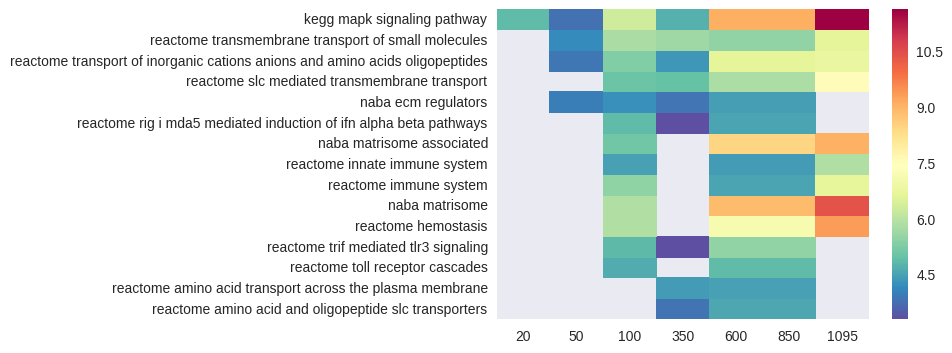

In [14]:
sns.heatmap(rnaSeqCPDF.ix[:, 1:-1], cmap="Spectral_r", yticklabels=list(rnaSeqCPDF['GeneSet']))

In [16]:
p25 = pd.read_table('ptop25.txt').rename(columns={'pValue':'25'})[['GeneSet', '25']]
p50 = pd.read_table('ptop50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
p100 = pd.read_table('ptop100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
pAll = pd.read_table('pAll.txt').rename(columns={'pValue':'238'})[['GeneSet', '238']]

pSeqCPs = [p25, p50, p100, pAll]

pSeqCPDF = pSeqCPs[0]
for pSeqCP in pSeqCPs[1:]:
    pSeqCPDF = pd.merge(pSeqCPDF, pSeqCP, how='outer', on='GeneSet')

pSeqCPDF['# NaN'] = pSeqCPDF.isnull().sum(axis=1)
pSeqCPDF = pSeqCPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

GeneSetNew = [GeneSet.replace('_', ' ').lower() for GeneSet in pSeqCPDF['GeneSet']]
pSeqCPDF['GeneSet'] = GeneSetNew

colNames = ['25', '50', '100', '238']
for colName in colNames:
    pSeqCPDF[colName] = [-(math.log(pvals, 10)) for pvals in pSeqCPDF[colName]]

pSeqCPDF

,GeneSet,25,50,100,238,# NaN
0,reactome neuronal system,6.416801,4.869666,5.554396,5.554396,0
1,reactome neuronal system,6.416801,4.869666,5.554396,9.634512,0
2,pid pdgfrb pathway,6.145087,4.910095,6.378824,6.378824,0
3,pid pdgfrb pathway,6.145087,4.910095,6.378824,6.970616,0
4,biocarta barr mapk pathway,4.728158,4.119186,5.663540,5.663540,0
5,kegg alzheimers disease,5.677781,5.931814,12.892790,12.892790,0
6,kegg alzheimers disease,5.677781,5.931814,12.892790,31.130182,0
7,reactome tca cycle and respiratory electron tr...,NaN,6.318759,13.767004,40.283162,1
8,reactome respiratory electron transport,NaN,5.756962,12.863279,12.863279,1
9,reactome respiratory electron transport atp sy...,NaN,5.381952,11.995679,11.995679,1


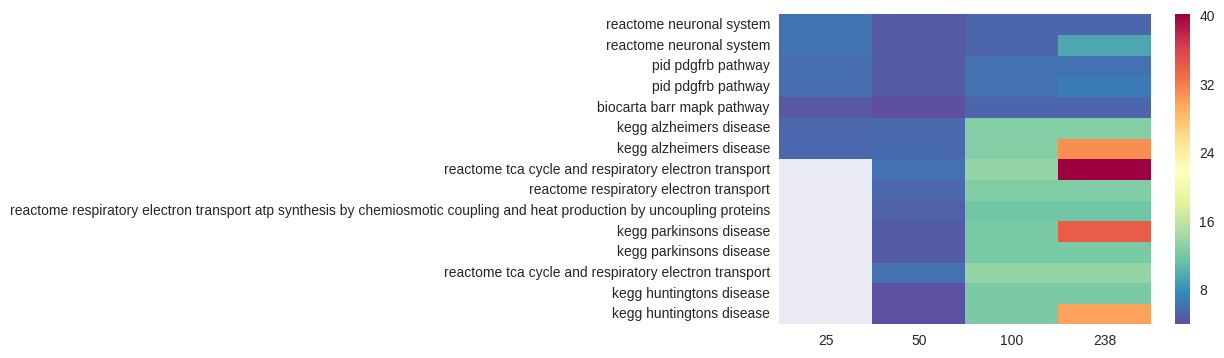

In [17]:
sns.heatmap(pSeqCPDF.ix[:, 1:-1], cmap="Spectral_r", yticklabels=list(pSeqCPDF['GeneSet']))